# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [81]:
%pylab inline
import glob
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster as scp

import datetime as dt  
import io 
import os


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import numpy as np
from numpy import random
import numpy.linalg as linalg

import geopandas as gpd

# import math
# from math import cos, log
import pylab as pl
import numpy as np
import patsy
import pandas as pd
# ADS kernel not working for this:
# import pandas_datareader.data as web
# from PIL import Image

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import seaborn as sns
from scipy.optimize import minimize
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import neighbors, datasets
from sklearn.ensemble import RandomForestClassifier


from tabulate import tabulate
# import urllib.request as url
import zipfile 

puidata= os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False

import urllib.request as url

from geopandas.tools import sjoin
import geopandas as gpd
import shapely
from shapely.geometry import LineString, Point
from fiona.crs import from_epsg

try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIdata")
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

Populating the interactive namespace from numpy and matplotlib


In [82]:
! python Assignment2_Supplementary.py

In [83]:
urlShapeFile = "https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip"
urllib.urlretrieve(urlShapeFile, "ZIP_CODE_040114.zip")
! mv ZIP_CODE_040114.zip $PUIDATA
! unzip $PUIDATA/ZIP_CODE_040114.zip -d $PUIDATA


Archive:  /nfshome/wz1405/PUIdata/ZIP_CODE_040114.zip
  inflating: /nfshome/wz1405/PUIdata/ZIP_CODE_040114.shx  
  inflating: /nfshome/wz1405/PUIdata/ZIP_CODE_040114.dbf  
  inflating: /nfshome/wz1405/PUIdata/ZIP_CODE_040114.prj  
  inflating: /nfshome/wz1405/PUIdata/ZIP_CODE_040114.sbn  
  inflating: /nfshome/wz1405/PUIdata/ZIP_CODE_040114.sbx  
  inflating: /nfshome/wz1405/PUIdata/ZIP_CODE_040114.shp  
  inflating: /nfshome/wz1405/PUIdata/ZIP_CODE_040114.shp.xml  


In [84]:
! mv zbp94totals.zip $PUIDATA
! unzip $PUIDATA/zbp94totals.zip -d $PUIDATA

! mv zbp95totals.zip $PUIDATA
! unzip $PUIDATA/zbp95totals.zip -d $PUIDATA

! mv zbp96totals.zip $PUIDATA
! unzip $PUIDATA/zbp96totals.zip -d $PUIDATA

! mv zbp97totals.zip $PUIDATA
! unzip $PUIDATA/zbp97totals.zip -d $PUIDATA

! mv zbp98totals.zip $PUIDATA
! unzip $PUIDATA/zbp98totals.zip -d $PUIDATA

! mv zbp99totals.zip $PUIDATA
! unzip $PUIDATA/zbp99totals.zip -d $PUIDATA

! mv zbp00totals.zip $PUIDATA
! unzip $PUIDATA/zbp00totals.zip -d $PUIDATA

! mv zbp01totals.zip $PUIDATA
! unzip $PUIDATA/zbp01totals.zip -d $PUIDATA

! mv zbp02totals.zip $PUIDATA
! unzip $PUIDATA/zbp02totals.zip -d $PUIDATA

! mv zbp03totals.zip $PUIDATA
! unzip $PUIDATA/zbp03totals.zip -d $PUIDATA

! mv zbp04totals.zip $PUIDATA
! unzip $PUIDATA/zbp04totals.zip -d $PUIDATA

! mv zbp05totals.zip $PUIDATA
! unzip $PUIDATA/zbp05totals.zip -d $PUIDATA

! mv zbp06totals.zip $PUIDATA
! unzip $PUIDATA/zbp06totals.zip -d $PUIDATA

! mv zbp07totals.zip $PUIDATA
! unzip $PUIDATA/zbp07totals.zip -d $PUIDATA

! mv zbp08totals.zip $PUIDATA
! unzip $PUIDATA/zbp08totals.zip -d $PUIDATA

! mv zbp09totals.zip $PUIDATA
! unzip $PUIDATA/zbp09totals.zip -d $PUIDATA

! mv zbp10totals.zip $PUIDATA
! unzip $PUIDATA/zbp10totals.zip -d $PUIDATA

! mv zbp11totals.zip $PUIDATA
! unzip $PUIDATA/zbp11totals.zip -d $PUIDATA

! mv zbp12totals.zip $PUIDATA
! unzip $PUIDATA/zbp12totals.zip -d $PUIDATA

! mv zbp13totals.zip $PUIDATA
! unzip $PUIDATA/zbp13totals.zip -d $PUIDATA

! mv zbp14totals.zip $PUIDATA
! unzip $PUIDATA/zbp14totals.zip -d $PUIDATA

Archive:  /nfshome/wz1405/PUIdata/zbp94totals.zip
  inflating: /nfshome/wz1405/PUIdata/zbp94totals.txt  
Archive:  /nfshome/wz1405/PUIdata/zbp95totals.zip
  inflating: /nfshome/wz1405/PUIdata/zbp95totals.txt  
Archive:  /nfshome/wz1405/PUIdata/zbp96totals.zip
  inflating: /nfshome/wz1405/PUIdata/zbp96totals.txt  
Archive:  /nfshome/wz1405/PUIdata/zbp97totals.zip
  inflating: /nfshome/wz1405/PUIdata/zbp97totals.txt  
Archive:  /nfshome/wz1405/PUIdata/zbp98totals.zip
  inflating: /nfshome/wz1405/PUIdata/zbp98totals.txt  
Archive:  /nfshome/wz1405/PUIdata/zbp99totals.zip
  inflating: /nfshome/wz1405/PUIdata/zbp99totals.txt  
Archive:  /nfshome/wz1405/PUIdata/zbp00totals.zip
  inflating: /nfshome/wz1405/PUIdata/zbp00totals.txt  
Archive:  /nfshome/wz1405/PUIdata/zbp01totals.zip
  inflating: /nfshome/wz1405/PUIdata/zbp01totals.txt  
Archive:  /nfshome/wz1405/PUIdata/zbp02totals.zip
  inflating: /nfshome/wz1405/PUIdata/zbp02totals.txt  
Archive:  /nfshome/wz1405/PUIdata/zbp03totals.zip
  inf

In [85]:
df94 = pd.read_csv(os.getenv("PUIDATA") + "/zbp94totals.txt")
df95 = pd.read_csv(os.getenv("PUIDATA") + "/zbp95totals.txt")
df96 = pd.read_csv(os.getenv("PUIDATA") + "/zbp96totals.txt")
df97 = pd.read_csv(os.getenv("PUIDATA") + "/zbp97totals.txt")
df98 = pd.read_csv(os.getenv("PUIDATA") + "/zbp98totals.txt")
df99 = pd.read_csv(os.getenv("PUIDATA") + "/zbp99totals.txt")
df00 = pd.read_csv(os.getenv("PUIDATA") + "/zbp00totals.txt")
df01 = pd.read_csv(os.getenv("PUIDATA") + "/zbp01totals.txt")
df02 = pd.read_csv(os.getenv("PUIDATA") + "/zbp02totals.txt")
df03 = pd.read_csv(os.getenv("PUIDATA") + "/zbp03totals.txt")
df04 = pd.read_csv(os.getenv("PUIDATA") + "/zbp04totals.txt")
df05 = pd.read_csv(os.getenv("PUIDATA") + "/zbp05totals.txt")
df06 = pd.read_csv(os.getenv("PUIDATA") + "/zbp06totals.txt")
df07 = pd.read_csv(os.getenv("PUIDATA") + "/zbp07totals.txt")
df08 = pd.read_csv(os.getenv("PUIDATA") + "/zbp08totals.txt")
df09 = pd.read_csv(os.getenv("PUIDATA") + "/zbp09totals.txt")
df10 = pd.read_csv(os.getenv("PUIDATA") + "/zbp10totals.txt")
df11 = pd.read_csv(os.getenv("PUIDATA") + "/zbp11totals.txt")
df12 = pd.read_csv(os.getenv("PUIDATA") + "/zbp12totals.txt")
df13 = pd.read_csv(os.getenv("PUIDATA") + "/zbp13totals.txt")
df14 = pd.read_csv(os.getenv("PUIDATA") + "/zbp14totals.txt")


In [86]:
# DF shape change at 2007 and 2010

In [87]:
# .rename(columns={'pop':'population',
#                           'lifeExp':'life_exp',
#                           'gdpPercap':'gdp_per_cap'}, 
#                  inplace=True)
df941 = df94.rename(columns={'est':'est94'})
df951 = df95.rename(columns={'est':'est95'}) 
df961 = df96.rename(columns={'est':'est96'})
df971 = df97.rename(columns={'est':'est97'})
df981 = df98.rename(columns={'EST':'est98','ZIP':'zip'})
df991 = df99.rename(columns={'EST':'est99','ZIP':'zip'})
df001 = df00.rename(columns={'EST':'est00','ZIP':'zip'})
df011 = df01.rename(columns={'EST':'est01','ZIP':'zip'})
df021 = df02.rename(columns={'EST':'est02','ZIP':'zip'})
df031 = df03.rename(columns={'est':'est03','ZIP':'zip'})
df041 = df04.rename(columns={'est':'est04','ZIP':'zip'})
df051 = df05.rename(columns={'est':'est05','ZIP':'zip'})
df061 = df06.rename(columns={'est':'est06'})
df071 = df07.rename(columns={'est':'est07'})
df081 = df08.rename(columns={'est':'est08'})
df091 = df09.rename(columns={'est':'est09'})
df101 = df10.rename(columns={'est':'est10'})
df111 = df11.rename(columns={'est':'est11'})
df121 = df12.rename(columns={'est':'est12'})
df131 = df13.rename(columns={'est':'est13'})
df141 = df14.rename(columns={'est':'est14'})

In [88]:
df942 = df941[['zip','est94']]
df952 = df951[['zip','est95']]
df962 = df961[['zip','est96']]
df972 = df971[['zip','est97']]
df982 = df981[['zip','est98']]
df992 = df991[['zip','est99']]
df002 = df001[['zip','est00']]
df012 = df011[['zip','est01']]
df022 = df021[['zip','est02']]
df032 = df031[['zip','est03']]
df042 = df041[['zip','est04']]
df052 = df051[['zip','est05']]
df062 = df061[['zip','est06']]
df072 = df071[['zip','est07']]
df082 = df081[['zip','est08']]
df092 = df091[['zip','est09']]
df102 = df101[['zip','est10']]
df112 = df111[['zip','est11']]
df122 = df121[['zip','est12']]
df132 = df131[['zip','est13']]
df142 = df141[['zip','est14']]

In [89]:
# merge multiple dfs: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
dfs = [df942, df952, df962, df972, df982, df992, df002, df012, df022, df032, df042, df052, df062, df072, df082, df092,
      df102, df112, df122, df132, df142]
df_final = reduce(lambda left,right: pd.merge(left,right,on='zip'), dfs)

In [90]:
df_final1 = df_final.astype(float)
# df_final1.dtypes

In [91]:
df_final2 = df_final1
df_final2['zip'] = df_final1['zip'] + 10000.0

In [16]:
#### # filepaths = ['data/d1.csv', 'data/d2.csv','data/d3.csv','data/d4.csv']
# # for file in filepaths:
# #     df = pd.concat(map(pd.read_csv, filepaths))
    
# # os.getenv("PUIDATA") + "/zbp94totals.txt"

# #specify a pattern of the file and pass it as a parameter into a glob function
# csv_files = glob.glob('zbp'+ '[94-99]' + 'totals.txt')
# # [0-9]
# #print csv_files which is a list of filenames
# print(csv_files)
 
# #intialize empty list that we will append dataframes to
# list_data = []
 
 
# #write a for loop that will go through each of the file name through globbing and the end result will be the list of dataframes
# for filename in csv_files:
#     data = pd.read_csv(os.getenv("PUIDATA") + filename)
#     list_data.append(data)
 
# #print list_data which is a list of dataframes
# list_data   

In [17]:
# Alternative approach
# urls = ("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp94totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp95totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp96totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp97totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp98totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp99totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp00totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp01totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp02totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp03totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp04totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp05totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp06totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp07totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp08totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp09totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp10totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp11totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp12totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp13totals.zip",
#         "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp14totals.zip")


# # filename = ('zbp' + url + 'totals.zip')
# for url in urls:
#     try:
#         urllib.urlretrieve(url,url)
#         sourceZip = zipfile.ZipFile(filename, 'r')
#         break
#     except ValueError:
#         pass


# for url in urls:
#     urllib.urlretrieve(url, "zbptotals.zip")
# ! mv zbp96totals.zip $PUIDATA
# ! unzip $PUIDATA/zbp96totals.zip -d $PUIDATA

# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a machine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [92]:
nyczipsshp = gpd.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")

In [93]:
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.251871482 188138.3800067157,...  
1  POLYGON ((1001613.712964058 186926.4395172149,...  
2  POLYGON ((1011174.275535807 183696.33770971, 1...  
3  POLYGON ((995908.3654508889 183617.6128015518,...  
4  POLYGON ((991997.1134308875 176307.4958601296,...

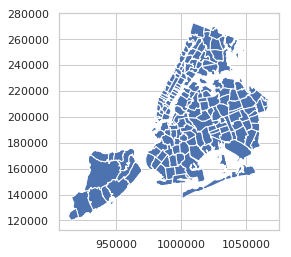

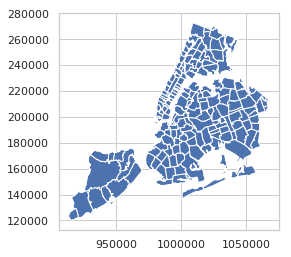

In [94]:
nyczipsshp.plot()
nyczipsshp.drop_duplicates("ZIPCODE").plot()
nyczipsshp.head()

In [95]:
nyczipsshp.shape

(263, 13)

In [96]:
nyczipsshp1 = nyczipsshp.rename(columns={'ZIPCODE':'zip'})

In [97]:
nyczipsshp2 = nyczipsshp1

In [98]:
nyczipsshp2['zip'] = nyczipsshp2['zip'].astype(float)

In [99]:
cbs = nyczipsshp2.merge(df_final, left_on='zip', right_on='zip', how='inner')
# (B, left_on='lkey', right_on='rkey', how='outer')
# if merged with df_final1, or df_final2, only 43 rows came out

In [100]:
# 20 years of data and 263 zipcodes
cbs.shape

(243, 34)

In [101]:
cbs1 = cbs[['zip','est94','est95','est96','est97','est98','est99','est00','est01',
           'est02','est03','est04','est05','est06','est07','est08','est09','est10',
           'est11','est12','est13','est14']]
cbs1.shape

(243, 22)

In [102]:
cbs2 = cbs1.set_index(['zip'])

In [103]:
cbs3 = cbs2.sort_index()

In [104]:
cleancsbtest=cbs3
valstest = ((cleancsbtest.T - cleancsbtest.mean(1)) / cleancsbtest.std(1)).T
valstest.head()

est94     est95     est96     est97     est98     est99     est00  \
zip                                                                             
10001.0 -1.839191 -1.193297 -1.287641 -0.714319  0.011404 -0.140998  0.468610   
10002.0 -1.713540 -1.626405 -1.377447 -1.053802 -1.168323 -0.964178 -0.486179   
10003.0 -1.820497 -1.434653 -1.307101 -0.930824 -0.567301 -0.535414 -0.458882   
10004.0 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   
10004.0 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   

            est01     est02     est03    ...        est05     est06     est07  \
zip                                      ...                                    
10001.0 -0.467573 -0.808663 -1.222326    ...     0.432324  1.179819  2.152288   
10002.0  0.176049 -0.506095 -0.174982    ...     0.522100  0.532058  0.529569   
10003.0 -0.717175 -0.672532 -0.391918    ...     0.127855  0.261785  0.708216   
10004.0 -0.420990 -0.371369 -0.379639    ...    -0.313478  0.108300  0.596238   
10004.0 -0.420990 -0.371369 -0.379639    ...    -0.313478  0.108300  0.596238   

            est08     est09     est10     est11     est12     est13     est14  
zip                                                                            
10001.0  1.593481  0.381523 -0.082940 -0.184541 -0.126483  0.149292  0.845986  
10002.0  0.544506  0.753631  0.995120  1.094703  1.199265  1.283911  1.244077  
10003.0  0.778369  0.867655  0.912298  1.058983  1.234367  1.435260  1.613833  
10004.0  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945  
10004.0  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945  

[5 rows x 21 columns]

In [105]:
###
kmtest = KMeans(n_clusters=5, random_state=444).fit(valstest)
kmtest.labels_.shape

(243,)

In [106]:
cbs4 = cbs3
cbs4['KmTestLabels'] = kmtest.labels_

In [107]:
valstest1 = valstest
valstest1['KmTestLabels'] = kmtest.labels_
valstest1.head()

est94     est95     est96     est97     est98     est99     est00  \
zip                                                                             
10001.0 -1.839191 -1.193297 -1.287641 -0.714319  0.011404 -0.140998  0.468610   
10002.0 -1.713540 -1.626405 -1.377447 -1.053802 -1.168323 -0.964178 -0.486179   
10003.0 -1.820497 -1.434653 -1.307101 -0.930824 -0.567301 -0.535414 -0.458882   
10004.0 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   
10004.0 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   

            est01     est02     est03      ...          est06     est07  \
zip                                        ...                            
10001.0 -0.467573 -0.808663 -1.222326      ...       1.179819  2.152288   
10002.0  0.176049 -0.506095 -0.174982      ...       0.532058  0.529569   
10003.0 -0.717175 -0.672532 -0.391918      ...       0.261785  0.708216   
10004.0 -0.420990 -0.371369 -0.379639      ...       0.108300  0.596238   
10004.0 -0.420990 -0.371369 -0.379639      ...       0.108300  0.596238   

            est08     est09     est10     est11     est12     est13     est14  \
zip                                                                             
10001.0  1.593481  0.381523 -0.082940 -0.184541 -0.126483  0.149292  0.845986   
10002.0  0.544506  0.753631  0.995120  1.094703  1.199265  1.283911  1.244077   
10003.0  0.778369  0.867655  0.912298  1.058983  1.234367  1.435260  1.613833   
10004.0  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945   
10004.0  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945   

         KmTestLabels  
zip                    
10001.0             0  
10002.0             0  
10003.0             3  
10004.0             3  
10004.0             3  

[5 rows x 22 columns]

In [108]:
valstest10 = valstest1[valstest1['KmTestLabels'] == 0]
valstest11 = valstest1[valstest1['KmTestLabels'] == 1]
valstest12 = valstest1[valstest1['KmTestLabels'] == 2]
valstest13 = valstest1[valstest1['KmTestLabels'] == 3]
valstest14 = valstest1[valstest1['KmTestLabels'] == 4]

In [109]:
print (valstest10.shape)
print (valstest11.shape)
print (valstest12.shape)
print (valstest13.shape)
print (valstest14.shape)

(51, 22)
(29, 22)
(18, 22)
(129, 22)
(16, 22)


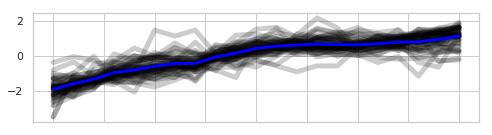

In [110]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest10)):
    valstest10.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)

np.mean(valstest10.iloc[:,:-1]).plot(lw=3,color="blue")

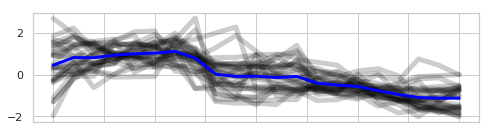

In [111]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest11)):
    valstest11.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)
np.mean(valstest11.iloc[:,:-1]).plot(lw=3,color="blue")

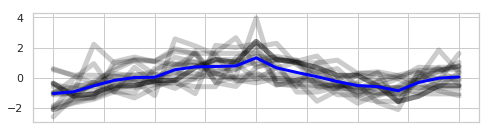

In [112]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest12)):
    valstest12.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)
np.mean(valstest12.iloc[:,:-1]).plot(lw=3,color="blue")

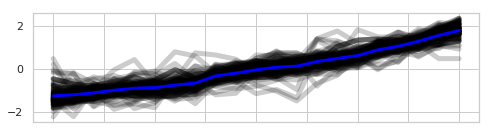

In [113]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest13)):
    valstest13.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)
np.mean(valstest13.iloc[:,:-1]).plot(lw=3,color="blue")

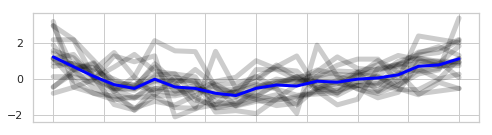

In [114]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest14)):
    valstest14.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)
np.mean(valstest14.iloc[:,:-1]).plot(lw=3,color="blue")

In [115]:
nyczipsshp = gpd.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

### The map of the clusters may look something like this

In [116]:
valstest2 = valstest1[['KmTestLabels']]
valstest2.head()

KmTestLabels
zip                  
10001.0             0
10002.0             0
10003.0             3
10004.0             3
10004.0             3

In [117]:
valstest3 = valstest2.reset_index()

In [118]:
valstest3.shape

(243, 2)

In [119]:
valstest4 = valstest3.dropna()
valstest4.shape

(243, 2)

In [120]:
valstest5 = valstest4
valstest5['zip'] = valstest5['zip'].astype(int)
valstest5.head()

zip  KmTestLabels
0  10001             0
1  10002             0
2  10003             3
3  10004             3
4  10004             3

In [121]:
nyczipsshp.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.251871482 188138.3800067157,...  
1  POLYGON ((1001613.712964058 186926.4395172149,...  
2  POLYGON ((1011174.275535807 183696.33770971, 1...  
3  POLYGON ((995908.3654508889 183617.6128015518,...  
4  POLYGON ((991997.1134308875 176307.4958601296,...

In [122]:
nyczipsshp1 = nyczipsshp
nyczipsshp1['ZIPCODE'] = nyczipsshp1['ZIPCODE'].astype(int)

In [123]:
# Map for Cluster of 5 and eventrally dropped all duplicates for both data frame before merge
nyczipsshp2 = nyczipsshp1.merge(valstest5, left_on='ZIPCODE', right_on='zip')
nyczipsshp2.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0    11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1    11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2    11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3    11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4    11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry    zip  KmTestLabels  
0  POLYGON ((1038098.251871482 188138.3800067157,...  11436             3  
1  POLYGON ((1001613.712964058 186926.4395172149,...  11213             3  
2  POLYGON ((1011174.275535807 183696.33770971, 1...  11212             3  
3  POLYGON ((995908.3654508889 183617.6128015518,...  11225             3  
4  POLYGON ((991997.1134308875 176307.4958601296,...  11218             3

In [124]:
nyczipsshp2.shape

(283, 15)

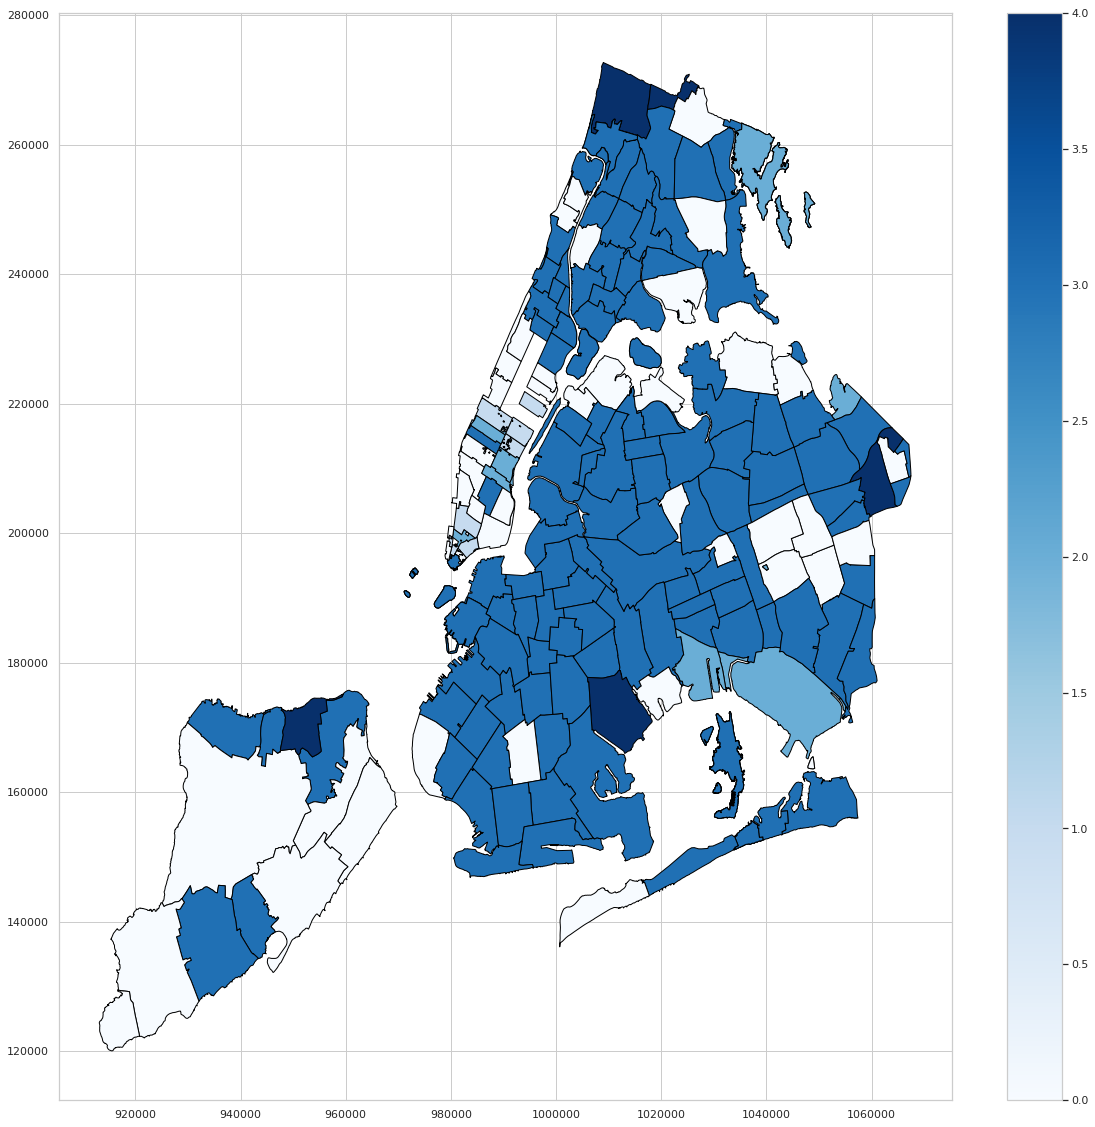

In [125]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
nyczipsshp2.plot(column='KmTestLabels',cmap = 'Blues',edgecolor='black', legend=True, ax=ax)

### Figure 3: 
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

In [126]:
cbs17 = cbs[['zip','est94','est95','est96','est97','est98','est99','est00','est01',
           'est02','est03','est04','est05','est06','est07','est08','est09','est10',
           'est11','est12','est13','est14']]
cbs17.head()

zip  est94  est95  est96  est97  est98  est99  est00  est01  est02  \
0  11436.0     51     50     53     51     51     58     65     57     78   
1  11213.0    406    420    433    456    476    473    477    493    546   
2  11212.0    505    494    502    527    519    541    520    527    577   
3  11225.0    381    387    388    410    416    409    417    422    479   
4  11218.0    985   1015   1049   1075   1118   1149   1161   1180   1228   

   ...    est05  est06  est07  est08  est09  est10  est11  est12  est13  est14  
0  ...       82     80     84     90     92     98    101     95     99    109  
1  ...      556    565    556    592    621    675    674    726    755    772  
2  ...      587    570    587    602    647    699    713    721    731    752  
3  ...      491    499    514    520    543    580    597    623    673    696  
4  ...     1332   1331   1377   1397   1457   1474   1523   1605   1687   1736  

[5 rows x 22 columns]

In [127]:
cbs27 = cbs17.set_index(['zip'])

In [128]:
cbs37 = cbs27.sort_index()

In [129]:
valstest2A = ((cbs37.T - cbs37.mean(1)) / cbs37.std(1)).T

In [130]:
kmtest27 = KMeans(n_clusters=7, random_state=444).fit(valstest2A)
kmtest27.labels_.shape

(243,)

In [131]:
cbs47 = cbs37
cbs47['KmTestLabels'] = kmtest.labels_
cbs47.head()

est94  est95  est96  est97  est98  est99  est00  est01  est02  est03  \
zip                                                                             
10001.0   6999   7088   7075   7154   7254   7233   7317   7188   7141   7084   
10002.0   1784   1819   1919   2049   2003   2085   2277   2543   2269   2402   
10003.0   3256   3377   3417   3535   3649   3659   3683   3602   3616   3704   
10004.0   1115   1124   1133   1173   1176   1233   1294   1247   1253   1252   
10004.0   1115   1124   1133   1173   1176   1233   1294   1247   1253   1252   

             ...       est06  est07  est08  est09  est10  est11  est12  est13  \
zip          ...                                                                
10001.0      ...        7415   7549   7472   7305   7241   7227   7235   7273   
10002.0      ...        2686   2685   2691   2775   2872   2912   2954   2988   
10003.0      ...        3909   4049   4071   4099   4113   4159   4214   4277   
10004.0      ...        1311   1370   1376   1379   1398   1404   1442   1479   
10004.0      ...        1311   1370   1376   1379   1398   1404   1442   1479   

         est14  KmTestLabels  
zip                           
10001.0   7369             0  
10002.0   2972             0  
10003.0   4333             3  
10004.0   1554             3  
10004.0   1554             3  

[5 rows x 22 columns]

In [132]:
valstest7 = valstest2A
valstest7['KmTestLabels'] = kmtest27.labels_
valstest7.head()

est94     est95     est96     est97     est98     est99     est00  \
zip                                                                             
10001.0 -1.839191 -1.193297 -1.287641 -0.714319  0.011404 -0.140998  0.468610   
10002.0 -1.713540 -1.626405 -1.377447 -1.053802 -1.168323 -0.964178 -0.486179   
10003.0 -1.820497 -1.434653 -1.307101 -0.930824 -0.567301 -0.535414 -0.458882   
10004.0 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   
10004.0 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   

            est01     est02     est03      ...          est06     est07  \
zip                                        ...                            
10001.0 -0.467573 -0.808663 -1.222326      ...       1.179819  2.152288   
10002.0  0.176049 -0.506095 -0.174982      ...       0.532058  0.529569   
10003.0 -0.717175 -0.672532 -0.391918      ...       0.261785  0.708216   
10004.0 -0.420990 -0.371369 -0.379639      ...       0.108300  0.596238   
10004.0 -0.420990 -0.371369 -0.379639      ...       0.108300  0.596238   

            est08     est09     est10     est11     est12     est13     est14  \
zip                                                                             
10001.0  1.593481  0.381523 -0.082940 -0.184541 -0.126483  0.149292  0.845986   
10002.0  0.544506  0.753631  0.995120  1.094703  1.199265  1.283911  1.244077   
10003.0  0.778369  0.867655  0.912298  1.058983  1.234367  1.435260  1.613833   
10004.0  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945   
10004.0  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945   

         KmTestLabels  
zip                    
10001.0             2  
10002.0             2  
10003.0             0  
10004.0             0  
10004.0             0  

[5 rows x 22 columns]

In [133]:
valstest70 = valstest2A[valstest2A['KmTestLabels'] == 0]
valstest71 = valstest2A[valstest2A['KmTestLabels'] == 1]
valstest72 = valstest2A[valstest2A['KmTestLabels'] == 2]
valstest73 = valstest2A[valstest2A['KmTestLabels'] == 3]
valstest74 = valstest2A[valstest2A['KmTestLabels'] == 4]
valstest75 = valstest2A[valstest2A['KmTestLabels'] == 5]
valstest76 = valstest2A[valstest2A['KmTestLabels'] == 6]

In [134]:
print (valstest70.shape)
print (valstest71.shape)
print (valstest72.shape)
print (valstest73.shape)
print (valstest74.shape)
print (valstest75.shape)
print (valstest76.shape)

(129, 22)
(15, 22)
(49, 22)
(7, 22)
(14, 22)
(14, 22)
(15, 22)


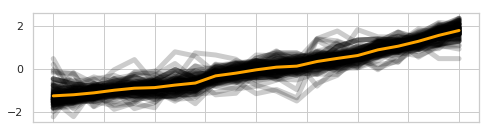

In [135]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest70)):
    valstest70.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)

np.mean(valstest70.iloc[:,:-1]).plot(lw=3,color="orange")

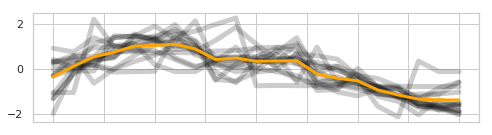

In [136]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest71)):
    valstest71.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)

np.mean(valstest71.iloc[:,:-1]).plot(lw=3,color="orange")

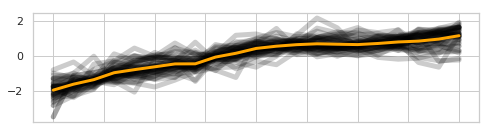

In [137]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest72)):
    valstest72.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)

np.mean(valstest72.iloc[:,:-1]).plot(lw=3,color="orange")

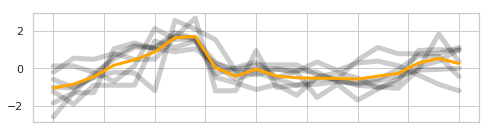

In [138]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest73)):
    valstest73.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)

np.mean(valstest73.iloc[:,:-1]).plot(lw=3,color="orange")

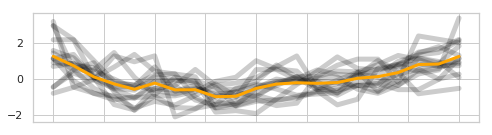

In [139]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest74)):
    valstest74.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)

np.mean(valstest74.iloc[:,:-1]).plot(lw=3,color="orange")

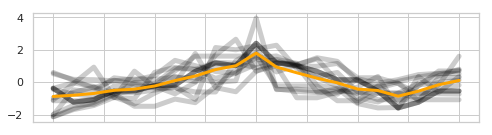

In [140]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest75)):
    valstest75.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)

np.mean(valstest75.iloc[:,:-1]).plot(lw=3,color="orange")

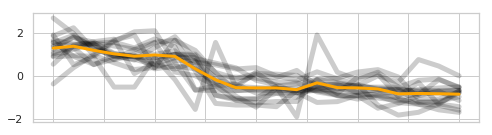

In [141]:
fig = plt.figure(figsize=[8,2])
for i in range(len(valstest76)):
    valstest76.iloc[i][:-1].plot(color = 'black', alpha = 0.2, lw=5)

np.mean(valstest76.iloc[:,:-1]).plot(lw=3,color="orange")

In [142]:
valstest2A1 = valstest2A[['KmTestLabels']]
valstest2A1.tail()

KmTestLabels
zip                  
11693.0             0
11693.0             0
11693.0             0
11694.0             0
11697.0             2

In [143]:
valstest3A = valstest2A1.reset_index()

In [144]:
valstest3A.shape

(243, 2)

In [145]:
valstest4A = valstest3A.dropna()
valstest4A.shape

(243, 2)

In [146]:
valstest5A = valstest4A
valstest5A['zip'] = valstest5A['zip'].astype(int)
valstest5A.head()

zip  KmTestLabels
0  10001             2
1  10002             2
2  10003             0
3  10004             0
4  10004             0

In [147]:
nyczipsshp2A = nyczipsshp1.merge(valstest5A, left_on='ZIPCODE', right_on='zip')
nyczipsshp2A.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0    11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1    11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2    11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3    11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4    11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry    zip  KmTestLabels  
0  POLYGON ((1038098.251871482 188138.3800067157,...  11436             0  
1  POLYGON ((1001613.712964058 186926.4395172149,...  11213             0  
2  POLYGON ((1011174.275535807 183696.33770971, 1...  11212             0  
3  POLYGON ((995908.3654508889 183617.6128015518,...  11225             0  
4  POLYGON ((991997.1134308875 176307.4958601296,...  11218             0

In [148]:
nyczipsshp2A.shape

(283, 15)

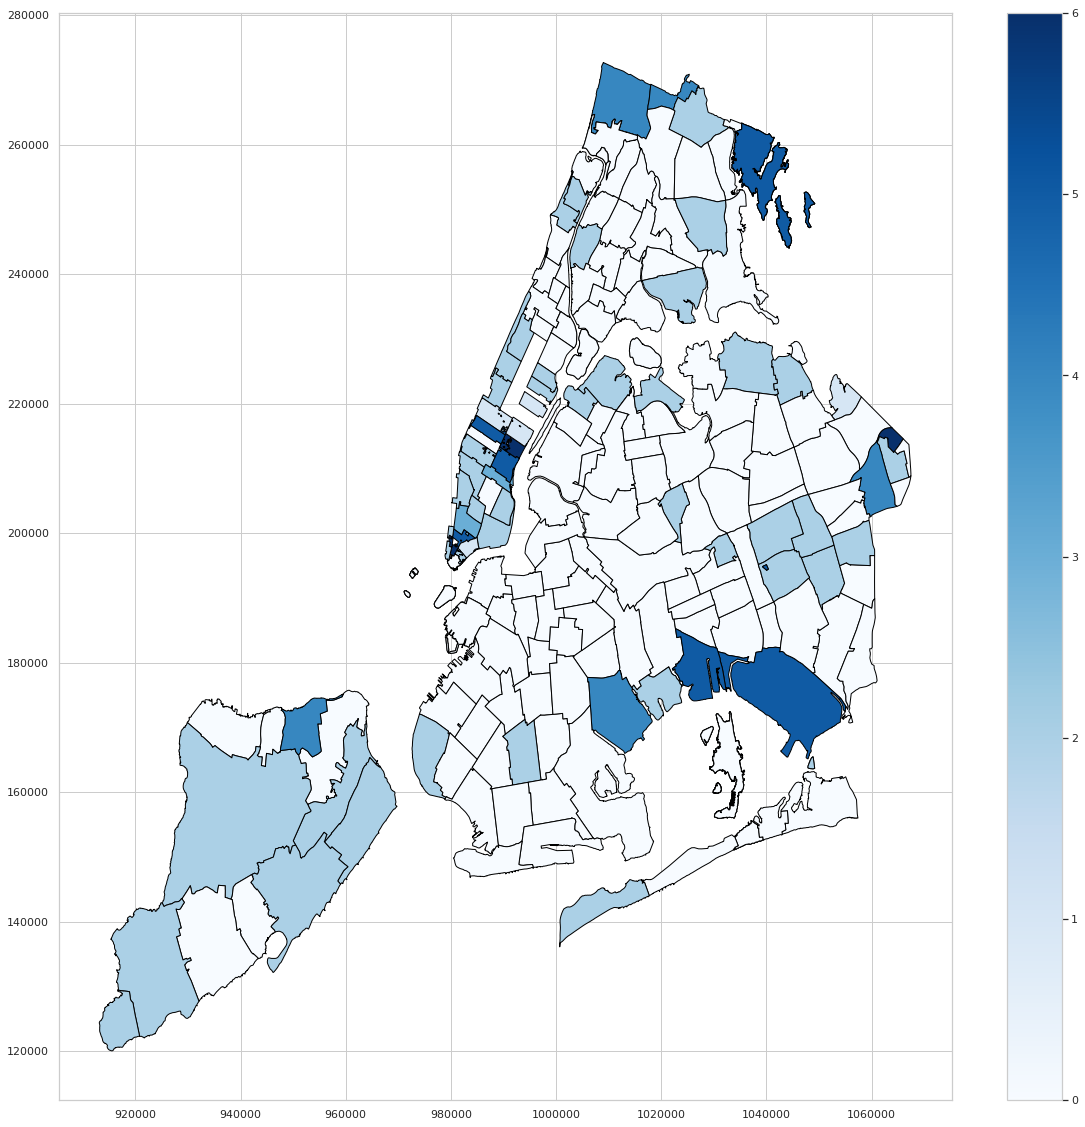

In [149]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
nyczipsshp2A.plot(column='KmTestLabels',cmap = 'Blues',edgecolor='black', legend=True, ax=ax)

### Figure 9: 
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# If you want to use agglomerative clustering

In [150]:
valstest.head()

est94     est95     est96     est97     est98     est99     est00  \
zip                                                                             
10001.0 -1.839191 -1.193297 -1.287641 -0.714319  0.011404 -0.140998  0.468610   
10002.0 -1.713540 -1.626405 -1.377447 -1.053802 -1.168323 -0.964178 -0.486179   
10003.0 -1.820497 -1.434653 -1.307101 -0.930824 -0.567301 -0.535414 -0.458882   
10004.0 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   
10004.0 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   

            est01     est02     est03      ...          est06     est07  \
zip                                        ...                            
10001.0 -0.467573 -0.808663 -1.222326      ...       1.179819  2.152288   
10002.0  0.176049 -0.506095 -0.174982      ...       0.532058  0.529569   
10003.0 -0.717175 -0.672532 -0.391918      ...       0.261785  0.708216   
10004.0 -0.420990 -0.371369 -0.379639      ...       0.108300  0.596238   
10004.0 -0.420990 -0.371369 -0.379639      ...       0.108300  0.596238   

            est08     est09     est10     est11     est12     est13     est14  \
zip                                                                             
10001.0  1.593481  0.381523 -0.082940 -0.184541 -0.126483  0.149292  0.845986   
10002.0  0.544506  0.753631  0.995120  1.094703  1.199265  1.283911  1.244077   
10003.0  0.778369  0.867655  0.912298  1.058983  1.234367  1.435260  1.613833   
10004.0  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945   
10004.0  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945   

         KmTestLabels  
zip                    
10001.0             0  
10002.0             0  
10003.0             3  
10004.0             3  
10004.0             3  

[5 rows x 22 columns]

In [151]:
valstestB = valstest.drop(['KmTestLabels'],axis=1)
valstestB.head()

est94     est95     est96     est97     est98     est99     est00  \
zip                                                                             
10001.0 -1.839191 -1.193297 -1.287641 -0.714319  0.011404 -0.140998  0.468610   
10002.0 -1.713540 -1.626405 -1.377447 -1.053802 -1.168323 -0.964178 -0.486179   
10003.0 -1.820497 -1.434653 -1.307101 -0.930824 -0.567301 -0.535414 -0.458882   
10004.0 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   
10004.0 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   

            est01     est02     est03    ...        est05     est06     est07  \
zip                                      ...                                    
10001.0 -0.467573 -0.808663 -1.222326    ...     0.432324  1.179819  2.152288   
10002.0  0.176049 -0.506095 -0.174982    ...     0.522100  0.532058  0.529569   
10003.0 -0.717175 -0.672532 -0.391918    ...     0.127855  0.261785  0.708216   
10004.0 -0.420990 -0.371369 -0.379639    ...    -0.313478  0.108300  0.596238   
10004.0 -0.420990 -0.371369 -0.379639    ...    -0.313478  0.108300  0.596238   

            est08     est09     est10     est11     est12     est13     est14  
zip                                                                            
10001.0  1.593481  0.381523 -0.082940 -0.184541 -0.126483  0.149292  0.845986  
10002.0  0.544506  0.753631  0.995120  1.094703  1.199265  1.283911  1.244077  
10003.0  0.778369  0.867655  0.912298  1.058983  1.234367  1.435260  1.613833  
10004.0  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945  
10004.0  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945  

[5 rows x 21 columns]

In [152]:
valstestB.dtypes

est94    float64
est95    float64
est96    float64
est97    float64
est98    float64
est99    float64
est00    float64
est01    float64
est02    float64
est03    float64
est04    float64
est05    float64
est06    float64
est07    float64
est08    float64
est09    float64
est10    float64
est11    float64
est12    float64
est13    float64
est14    float64
dtype: object

In [153]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

agc5 = AgglomerativeClustering(n_clusters=5, linkage='average').fit(valstestB)
labelsag5 = agc5.labels_
centroidsag5 = np.zeros((5, valstestB.shape[1]))

In [155]:
agc7 = AgglomerativeClustering(n_clusters=7, linkage='average').fit(valstestB)
labelsag7 = agc7.labels_
centroidsag7 = np.zeros((7, valstestB.shape[1]))

In [156]:
# agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit()
# labelsag = agc.labels_
# centroidsag = np.zeros((nc, vals.shape[1]))



### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

In [157]:
zipcodes=list(nyczipsshp2A['ZIPCODE'])

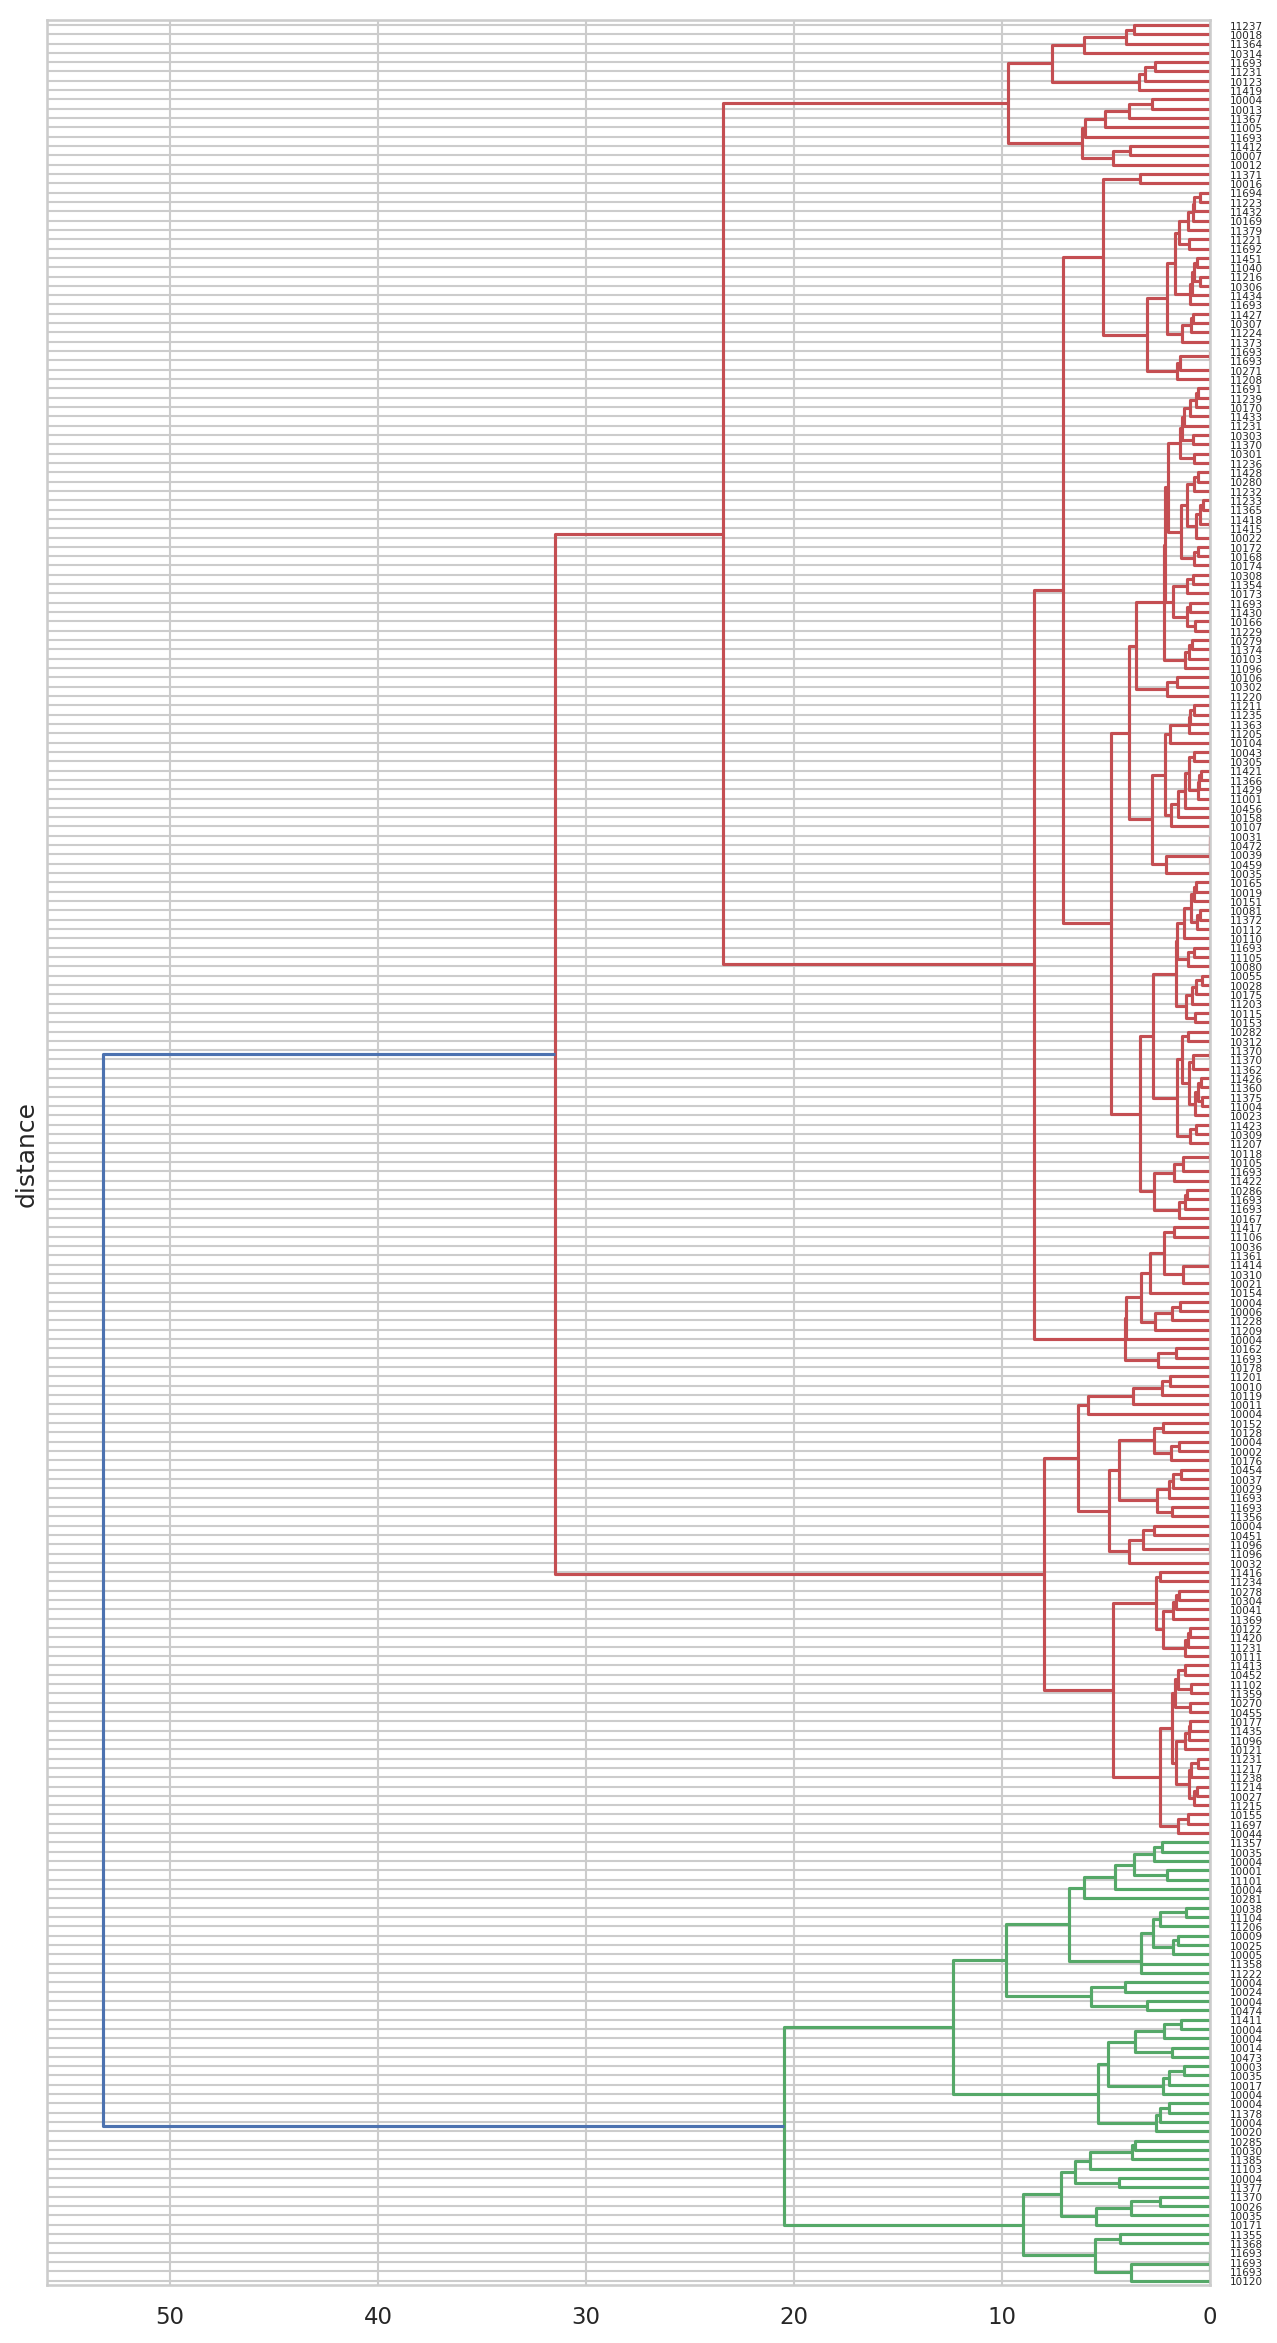

In [158]:
fig = pl.figure(figsize=(10,20), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(valstest, method='ward'),
                               labels = zipcodes,
                               leaf_rotation=0.,  # rotates the x axis labels
                               leaf_font_size=5.,
                               orientation='left')  # font size for the x axis labels)


In [86]:
!pwd

/nfshome/wz1405/PUI2018_wz1405/HW12_wz1405
